In [34]:
import numpy as np
import matplotlib.pyplot as plt

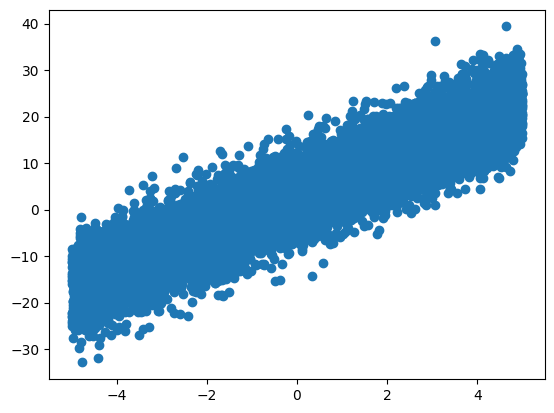

In [38]:
# Generate random data
n = 10000
X = 10*np.random.random(n) - 5
Y = 4*X + 3 + np.random.normal(loc=0,scale = 5,size =n)

plt.figure()
plt.scatter(X,Y)

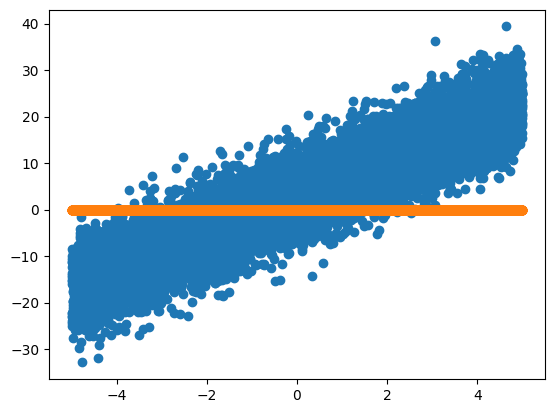

In [39]:
def Y_based_on_X(x,a,b):
  return a*x + b

# Gradient Descend
a,b = 0,0
l = 0.01

plt.figure()
plt.scatter(X,Y)
plt.scatter (X,Y_based_on_X(X,a,b))

In [40]:
X_0 = []
for i in range(len(X)):
  X_0.append((1,X[i]))
X_matrix = np.matrix(X_0)
Y_matrix = np.matrix(Y)
beta = (X_matrix.T*X_matrix).I*X_matrix.T*Y_matrix.T
beta

matrix([[2.92351718],
        [3.99902946]])

In [41]:
def gradient_descend(X,Y,learning_rate,tolerance):
  # Initializing our only parameter theta (our weight matrix)
    theta = np.random.randn(2)
    m = len(Y)
    cost_history = []

    slope = float(theta[0])
    intercept = float(theta[1])

    cost = tolerance + 100 # 100 is a random number just to make it greater
    iter = 0

    while cost > tolerance :
        # Calculate predicted values and the error using the MSE function. Then,
        # calculate the gradient and update the parameter using the GD algorithm.
        # Also append the calculated cost at the end of cost_history for debugging if needed.

        predicted_values = slope*X + intercept

        d_slope = (-2/m)*sum(X*(Y-predicted_values))
        d_intercept = (-2/m)*sum(Y-predicted_values)

        slope -= learning_rate*d_slope
        intercept -= learning_rate*d_intercept

        cost = (1/m)*np.sum((Y-predicted_values)**2)
        cost_history.append(cost)

        if iter > 1:
          if cost_history[iter-1] - cost_history[iter] < tolerance:
            break

        iter += 1
        print(iter, "  Cost = ",cost)

    return slope,intercept, cost_history


In [42]:
tolerance = 10**(-10)
slope,intercept,c_hist = gradient_descend(X,Y,l,tolerance)

1   Cost =  90.26317667763085
2   Cost =  71.7215450754494
3   Cost =  58.795523697815604
4   Cost =  49.76832159328136
5   Cost =  43.44864228496871
6   Cost =  39.009809146585106
7   Cost =  35.87814186508713
8   Cost =  33.65550593795168
9   Cost =  32.06557324875153
10   Cost =  30.916534657971813
11   Cost =  30.075227884036117
12   Cost =  29.449185926082777
13   Cost =  28.97418118556278
14   Cost =  28.60558280121545
15   Cost =  28.312359799171013
16   Cost =  28.072920054881934
17   Cost =  27.872223043257144
18   Cost =  27.699776414891947
19   Cost =  27.548245821744718
20   Cost =  27.412490251610794
21   Cost =  27.288892606781076
22   Cost =  27.17489514221611
23   Cost =  27.068677049402098
24   Cost =  26.968930671560578
25   Cost =  26.87470615752924
26   Cost =  26.785303604903255
27   Cost =  26.7001981565064
28   Cost =  26.618987964279608
29   Cost =  26.54135802233876
30   Cost =  26.46705501334392
31   Cost =  26.395869798830415
32   Cost =  26.3276252155749
33 

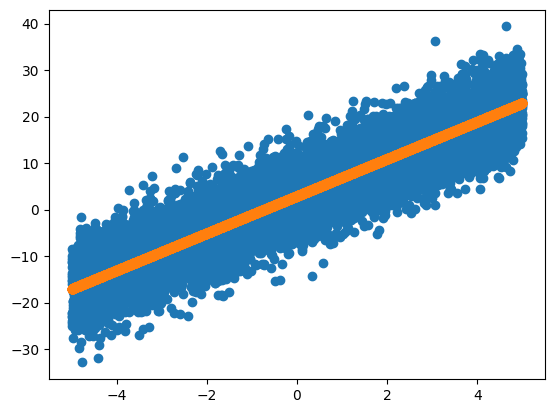

In [43]:
plt.figure()
plt.scatter(X,Y)
plt.scatter (X,Y_based_on_X(X,slope,intercept))

Now, lets do it using Stochastic Gradient Descend
Approach:
1. We take the (x,y) points and the randomize the distribution we get and divide in into different batches
2. Prcoeed similarly as in the normal Gradient Descend

In [44]:
def stochastic_descend(X,Y,learning_rate,tolerance,n_samples,batch_size):
  theta = np.random.randn(2)
  slope = float(theta[0])
  intercept = float(theta[1])
  cost_history = []
  iter = 0

  cost = tolerance + 10

  while cost > tolerance :

    # Randomizing the dataset
    indices = np.random.permutation(n_samples)
    X_shuffled = X[indices]
    Y_shuffled = Y[indices]

    # Forming the batches
    for i in range(0, n_samples, batch_size):
      X_batch = X_shuffled[i:i+batch_size]
      Y_batch = Y_shuffled[i:i+batch_size]

      # Gradient Descend
      Y_pred = np.dot(X_batch, slope) + intercept
      error = Y_pred - Y_batch
      d_slope = np.dot(X_batch.T, error) / X_batch.shape[0]
      d_intercept = np.mean(error)

      # New slope and intercept
      slope -= learning_rate*d_slope
      intercept -= learning_rate*d_intercept

    cost = np.linalg.norm(d_slope)
    cost_history.append(cost)

    if iter > 1:
          if cost_history[iter-1] - cost_history[iter] < tolerance:
            break

    iter += 1
    print(iter, "  Cost = ",cost)



  return slope,intercept,cost_history


In [45]:
tolerance = 10**(-10)
n_samples = n

slope,intercept,c_hist = stochastic_descend(X,Y,l,tolerance,n,100)

print(slope,intercept)

1   Cost =  1.1788091965262972
2   Cost =  0.20121050688179054
4.012488380643845 2.7995789545440304


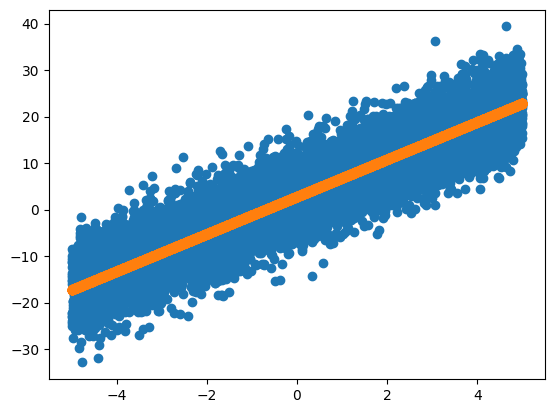

In [46]:
plt.figure()
plt.scatter(X,Y)
plt.scatter (X,Y_based_on_X(X,slope,intercept))